# Minimos Cuadrados

Cuando se tiene un conjunto de datos etiquetados $\{(\mathbf x_i,y_i)\}_{i=1}^N$ reales, donde $\mathbf x_i\in \mathbb R^D$ son los vectores de $D$ características, y se busque predecir el valor $y$ dado un $\mathbf x$ nuevo, un algoritmo de aprendizaje sencillo que se pude utilizar es plantear un modelo que resulte de una combinación lineal de las características de $\mathbf x$ y minimizar el error. 

Este podría entonces verse de la siguiente manera, con un real $b$ y un vector de parámetros $\mathbf w \in \mathbb R^D$,  $f(\mathbf x_i)=\mathbf {wx} + b$.

Ahora, de manera que se obtengan valores óptimos para los parámetros, se puede utilizar la expresión $\left(f(\mathbf x_i)-y_i\right)^2$ como función de pérdida, con el objetivo de minimizar entonces $\frac{1}{N}\sum_{i=1,\cdots,N}\left(f(\mathbf x_i)-y_i\right)^2$. De aquí que el procedimiento de optimización de llame *mínimos cuadrados*.

Notamos que $f(\mathbf x_i)=\mathbf {wx} + b=\sum_{i=0}^{D}w_ix_i$ donde $x_0=1$ y $w_0=b$. Con esto en cuenta, si consideramos la matriz $\mathbf A\in\mathbb R^{N\times (D+1)}$ cuyas filas sean los $N$ vectores de características $\mathbf x_i$, y $\mathbf y$ como el vector de etiquetas $y_n$, entonces el objetivo puede escribir de la forma: $\frac{1}{N} \|{\mathbf A\mathbf w - \mathbf y}\|^2$. 

Así, la formulación de los mínimos cuadrados se basará en resolver: $\tilde{w} =\mbox{arg min}_{w} \| \mathbf A\mathbf w - \mathbf y \|^2$.

Resolver lo anterior llevará a encontrar $\mathbf w$ tal que se satisfagan las ecuaciones normales $\mathbf A^{\top}\mathbf A \mathbf w=\mathbf A^{\top}\mathbf y$. Vemos que, si $\mathbf A^{\top}\mathbf A$ es invertible, entonces $\mathbf w= \left(\mathbf A^{\top}\mathbf A\right)^{-1}\left(\mathbf A^{\top}\mathbf A\right)\mathbf w=\left(\mathbf A^{\top}\mathbf A\right)^{-1}\mathbf A^{\top}\mathbf y$. En tal caso se podría ver la *pseudo inversa* $\mathbf A^{+}=\left(\mathbf A^{\top}\mathbf A\right)^{-1}\mathbf A^{\top}$ de $\mathbf A$ directamente y así encontrar una solución para $\mathbf w=\mathbf A^{+}\mathbf y$. En este orden de ideas, esta solución única se daría cuando la matriz de caracterísicas $\mathbf A$ tenga columnas linealmente idependientes.

Lo anterior pues, de ser así, $N(\mathbf A)=\{\mathbf 0\}$, y si $\mathbf v\in\ \mathbf A^{\top}\mathbf A$ entonces tenemos que: $$\mathbf A^{\top}\mathbf A \mathbf v=\mathbf 0\Longrightarrow \mathbf v^{\top}\mathbf A^{\top}\mathbf A \mathbf v=\mathbf v^{\top}\mathbf 0=\mathbf 0 \Longrightarrow (\mathbf{Av})^{\top}\mathbf{Av}=\mathbf 0\Longrightarrow\|\mathbf {Av}\|^{2}=0\Longrightarrow \mathbf{Av}=\mathbf 0\Longrightarrow \mathbf v\in N(A\mathbf)\Longrightarrow \mathbf v=\mathbf 0.$$ 
Por lo tanto $N(\mathbf A^{\top}\mathbf A)=\{\mathbf 0\}$, luego $\mathbf A^{\top}\mathbf A$ es invertible. 

Podemos concluir que para que se pueda solucionar de este modo con el método de los mínimos cuadrados, la matriz de características construida no podrá tener columna de $\mathbf{0}$ para mantener la independencia lineal de las columnas. Además, si es el caso que $N<D+1$, necesariamente el $rank(\mathbf A)<D+1$ de donde las columnas de $\mathbf A$ no podrán ser todas linealmente independientes; de manera que el sistema debería ser sobredeterminado para esta solución.


## Ejemplo: Mínimos cuadrados para estudiar el comportamiento del precio de productos.

Podemos, por ejemplo, utilizar el método de mínimos cuadrados para estudiar el comportamiento del precio de un producto a través del tiempo, como podría ser el precio del bitcoin. Aquí, la característica con la que contamos corresponde al día (fecha) y el valor que buscamos predecir es el precio del producto para un día específico en el futuro. En este caso, veremos precio del Bitcoin no en relación con el tiempo sino en relación con el precio de tres mercancías más: el oro, la plata y el petróleo, durante el último año.

En primera instancia notamos que la cantidad de datos etiquetados  $\{(\mathbf x_i,y_i)\}_{i=1}^N$ con los que contamos corresponde a $N=365$, pues sabemos los precios del último año. Además, el vector de características $\mathbf x_i$ será de dimensión $3$, pues las características son precisamente el precio de la plata, el oro y el pretróleo. En general, los datos que tenemos son los siguientes:

In [498]:
using CSV
using DataFrames

TaggedData=CSV.read("data/DataComodities.csv",DataFrame)

,Date,Silver_Price,Gold_Price,Oil_Price,BitCoin_Price
,Date,Float64,Float64,Float64,Float64
1,2021-01-01,26.525,1887.6,53.55,29374.2
2,2021-01-02,26.7665,1906.13,53.55,32127.3
3,2021-01-03,27.008,1924.67,60.64,32782.0
4,2021-01-04,27.584,1943.2,61.45,31971.9
5,2021-01-05,27.867,1940.35,64.585,33992.4
6,2021-01-06,27.27,1931.95,67.72,36824.4
7,2021-01-07,27.473,1920.1,75.23,39371.0
8,2021-01-08,24.845,1862.9,71.91,40797.6
9,2021-01-09,24.989,1857.68,68.59,40254.5


Podríamos, si quisiéramos, ver el comportamiento del precio del bitcoin a lo largo del último año:

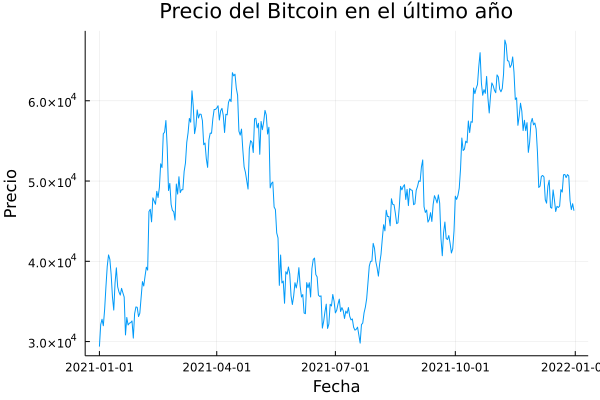

In [499]:
Bit_Price=TaggedData[:,5] #Vemos únicamente la quinta columna correspondiente al precio del Bitcoin 
Days=TaggedData[:,1]
N=size(Bit_Price,1) 

using Plots
plot(Days, Bit_Price, label=(false), xlabel="Fecha", ylabel="Precio")
title!("Precio del Bitcoin en el último año")

En este caso, como el interés es distinto, no veremos el precio del Bitcoin en relación con el tiempo sino con el precio de los demás productos.

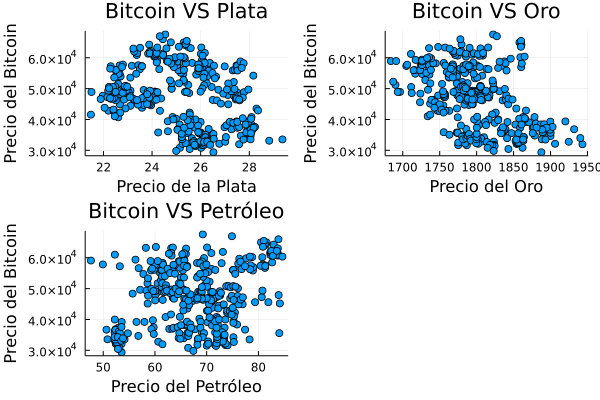

In [500]:
Silv_Price=TaggedData[:,2]
Gold_Price=TaggedData[:,3]
Oil_Price=TaggedData[:,4]

PSilv=plot(Silv_Price, Bit_Price, seriestype=:scatter, label=(false), title="Bitcoin VS Plata", xlabel="Precio de la Plata", ylabel="Precio del Bitcoin")
PGold=plot(Gold_Price, Bit_Price, seriestype=:scatter, label=(false), title="Bitcoin VS Oro", xlabel="Precio del Oro", ylabel="Precio del Bitcoin")
POil=plot(Oil_Price, Bit_Price, seriestype=:scatter, label=(false), title="Bitcoin VS Petróleo", xlabel="Precio del Petróleo", ylabel="Precio del Bitcoin")

plot(PSilv, PGold, POil)

Con el fin entonces de hacer la formulación de los mínimos cuadrados podemos definir la matriz de características $\mathbf A$ a partir de los precios de los demás productos, y el vector de etiquetas $\mathbf y$ a partir del precio del Bitcoin.

In [501]:
Comodities=Array(TaggedData[:,2:4]) #Vemos únicamente las columnas correspondientes a los precios de la plata, el oro y el petróleo
A=[ones(N,1) Comodities]
Y=copy(Bit_Price) #Vemos únicamente la columna ya definina con los precios del Bitcoin

display(A)
display(Y)


365×4 Matrix{Float64}:
 1.0  26.525   1887.6   53.55
 1.0  26.7665  1906.13  53.55
 1.0  27.008   1924.67  60.64
 1.0  27.584   1943.2   61.45
 1.0  27.867   1940.35  64.585
 1.0  27.27    1931.95  67.72
 1.0  27.473   1920.1   75.23
 1.0  24.845   1862.9   71.91
 1.0  24.989   1857.68  68.59
 1.0  25.133   1852.47  75.88
 1.0  25.478   1847.25  84.05
 1.0  25.637   1841.25  65.57
 1.0  25.768   1858.85  52.91
 ⋮                      
 1.0  22.275   1796.3   68.23
 1.0  22.502   1793.75  71.12
 1.0  22.792   1792.8   72.76
 1.0  22.94    1805.2   73.79
 1.0  22.91    1805.2   74.235
 1.0  22.894   1805.2   74.68
 1.0  22.878   1805.2   75.125
 1.0  22.979   1805.2   75.57
 1.0  23.111   1805.2   75.98
 1.0  22.848   1794.25  76.56
 1.0  23.091   1805.85  76.99
 1.0  23.381   1805.85  75.21

365-element Vector{Float64}:
 29374.152344
 32127.267578
 32782.023438
 31971.914063
 33992.429688
 36824.363281
 39371.042969
 40797.609375
 40254.546875
 38356.441406
 35566.65625
 33922.960938
 37316.359375
     ⋮
 46880.277344
 48936.613281
 48628.511719
 50784.539063
 50822.195313
 50429.859375
 50809.515625
 50640.417969
 47588.855469
 46444.710938
 47178.125
 46306.445313

Habiendo hecho esto, como vimos al inicio, basta con resolver: $\tilde{w} =\mbox{arg min}_{w} \| \mathbf A\mathbf w - \mathbf y \|^2$. Recordemos que la solución $\mathbf w=\mathbf A^{+}\mathbf y$ se obtiene con la *pseudo inversa* $\mathbf A^{+}=\left(\mathbf A^{\top}\mathbf A\right)^{-1}\mathbf A^{\top}$.

In [502]:
using LinearAlgebra
PA=inv(transpose(A)*A)*(transpose(A))
w=PA*Y

display(PA)
display(w)

4×365 Matrix{Float64}:
 -0.127319     -0.165512     -0.229862     …  -0.0431676    -0.0368649
 -0.00128072   -0.00134933   -0.000854255     -0.00201273   -0.00179943
  0.000115145   0.000137219   0.000153158      4.40169e-5    3.98607e-5
 -0.00065903   -0.000655872  -0.000314408      0.000257176   0.000195298

4-element Vector{Float64}:
 184484.39002614547
   -374.2838754142471
    -80.5519441184997
    254.41723880909163

Esta *pseudo inversa* también puede ser computada usando `pinv` directamente:

In [503]:
w_1=pinv(A)*Y

4-element Vector{Float64}:
 184484.39002621977
   -374.28387541476286
    -80.55194411853559
    254.41723880900466

Finalmente, llegamos entonces a una estimación $\mathbf {\hat{y}}=\mathbf {Aw}$ del vector de etiquetas $\mathbf y$ mediante una transformación lineal $\mathbf {\hat{y}}=\mathbf {Aw}=\mathbf {AA^{+}y}$.

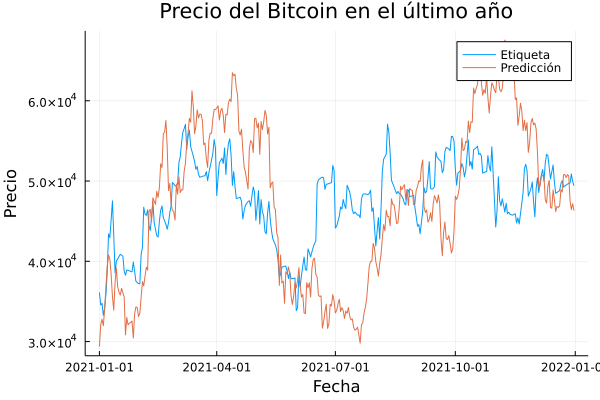

In [504]:
Pred_Bit_Price= Yhat=A*w
plot(Days, Pred_Bit_Price, label="Etiqueta")
plot!(Days, Bit_Price, label="Predicción")
xlabel!("Fecha")
ylabel!("Precio")
title!("Precio del Bitcoin en el último año")

### Modelos no lineales.

Los algortimos de aprendizaje que podemos usar para predecir valores no tienen por qué ser expresados como combinaciones lineales de las características, sino que pueden plantearse también modelos no lineales. Volvamos por ejemplo al precio del Bitcoin con respecto a la fecha, pero esta vez buscando una relación no lineal. Esto se puede hacer con paquetes como `Polynomials`o `LsqFit`.

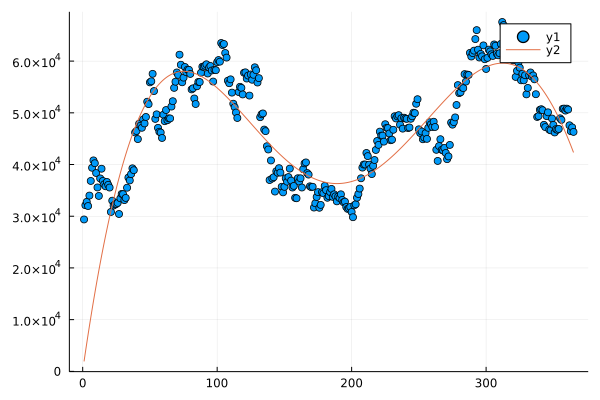

In [561]:
using Polynomials

ydat=Bit_Price 
l=size(ydat,1)
xdat=Array((1:l))


pfit6=fit(xdat,ydat,6)

scatter(xdat, ydat)
plot!(xdat, pfit6.(xdat))


In [562]:
pfit6

Polynomial(119.11693612045279 + 1814.0919304441907*x - 17.062778400142545*x^2 + 0.03254820781182405*x^3 + 0.00018239917304342085*x^4 - 7.619420511144731e-7*x^5 + 7.482354468700409e-10*x^6)

## Point Set Registration problem

Para el siguiente problema se cuenta con un conjunto finito dado de $M$ puntos en $\mathbb R^{D}$, esto es $\mathcal M=\{\mathbf {y_i}\}_{i=1}^{M}$, y el objetivo es encontrar una transformación que pueda trasladar algún otro conjunto finito $\mathcal S=\{\mathbf {x_i}\}$ de manera que sus puntos queden alineados con el primero. Lo que se querrá de dicha transformación es precisamente que minimice la distancia (punto a punto) entre los conjuntos, y es allí donde se puede relacionar con los mínimos cuadrados, al utilizar el método para estimar los parámetros de dicha transformación. 

Buscamos entonces los parámetros de transformación $\mathbf R$ (rotación), $t$ (traslación) y $e$ (escala) de manera que el objetivo sea, como hemos planteado anteriormente, minimizar el cuadrado de los errores: $\displaystyle\frac{1}{M}\sum_{i=1,\cdots,M}\left(y_i-f(\mathbf x_i)\right)^2=\frac{1}{M}\displaystyle\sum_{i=1,\cdots,M} \| \mathbf {y_i}-(e \mathbf R \mathbf {x_i} + t)\|^2$. 

Lo haremos siguiendo  [ S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns](https://www.cis.jhu.edu/software/lddmm-similitude/umeyama.pdf).

Primero definimos la siguiente parametrización que, para este ejemplo, será el conjunto de puntos $\mathcal M=\{\mathbf y_i\}_{i=1}^{N}$ con $\mathbf{y_i}\in \mathbb R^{2}$. 

Puede, si desea, modificar los parámetros $a,b,c,d,j$ y $k$ para trabajar sobre diferentes figuras.


In [505]:

M=1000
t=LinRange(-π,π,M)

a=1; b=2; c=1; d=2; j=3; k=3;
f1(x)=x^j; f2(x)=x^k
y_1=cos.(a*t)-f1.(cos.(b*t))
y_2=sin.(c*t)-f2.(sin.(d*t))

y=[y_1 y_2]

1000×2 Matrix{Float64}:
 -2.0      -1.22465e-16
 -1.99974  -0.00629142
 -1.99897  -0.0125945
 -1.99769  -0.018921
 -1.99589  -0.0252825
 -1.99359  -0.0316905
 -1.99077  -0.0381566
 -1.98745  -0.0446922
 -1.98363  -0.0513085
 -1.97932  -0.0580168
 -1.97451  -0.064828
 -1.96921  -0.071753
 -1.96343  -0.0788024
  ⋮        
 -1.96921   0.071753
 -1.97451   0.064828
 -1.97932   0.0580168
 -1.98363   0.0513085
 -1.98745   0.0446922
 -1.99077   0.0381566
 -1.99359   0.0316905
 -1.99589   0.0252825
 -1.99769   0.018921
 -1.99897   0.0125945
 -1.99974   0.00629142
 -2.0       1.22465e-16

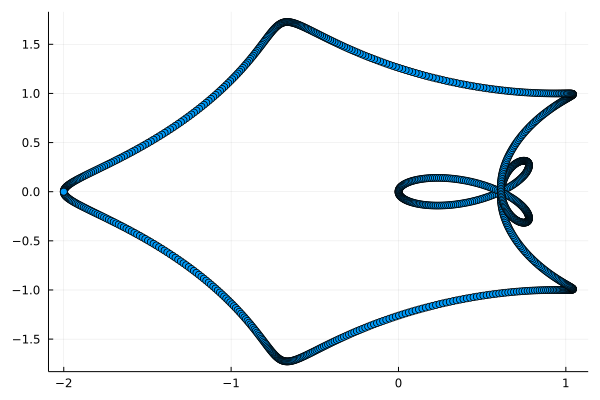

In [506]:
using Plots
scatter(y_1,y_2, label=(false))

Constuyamos ahora el conjutno de datos $\mathcal{S}$ para alinear, para que se vea con claridad escalaremos, rotaremos y trasladaremos la figura. Puede aquí también variar dichos parámetros.

In [507]:
escala=(1/3)
ang=(π/6)
hor=0.2
vert=1.6

x=escala*y
x=x*Array([cos(ang) -sin(ang); sin(ang) -cos(ang)])
x[:,1]=x[:,1]+hor*ones(M)
x[:,2]=x[:,2]+vert*ones(M)

x_1=x[:,1]
x_2=x[:,2]

x

1000×2 Matrix{Float64}:
 -0.37735   1.93333
 -0.378325  1.93511
 -0.379153  1.9368
 -0.379836  1.93841
 -0.380378  1.93995
 -0.38078   1.94141
 -0.381046  1.94281
 -0.381177  1.94414
 -0.381177  1.94542
 -0.381049  1.94663
 -0.380796  1.9478
 -0.38042   1.94891
 -0.379926  1.94999
  ⋮         
 -0.356503  1.90749
 -0.359186  1.91037
 -0.36171   1.91314
 -0.364074  1.91579
 -0.36628   1.91834
 -0.368327  1.92078
 -0.370217  1.92312
 -0.371951  1.92535
 -0.373529  1.92749
 -0.374954  1.92953
 -0.376227  1.93147
 -0.37735   1.93333

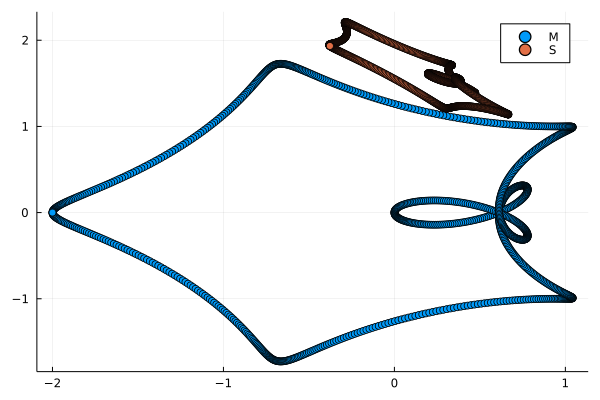

In [508]:
scatter(y_1,y_2, label="M")
scatter!(x_1, x_2, label="S")

Calculamos primero los siguientes $$\mathbf{μ_x}=\displaystyle \frac{1}{N}\sum_{i=1}^{N}\mathbf{x_i}, \hspace13pt\mathbf{μ_y}=\displaystyle \frac{1}{N}\sum_{i=1}^{N}\mathbf{y_i}  $$ $$σ_{x}^{2}=\displaystyle \frac{1}{N}\sum_{i=1}^{N}\|\mathbf{x_i}-\mathbf{μ_x}\|^2, \hspace13pt σ_{y}^{2}=\displaystyle \frac{1}{N}\sum_{i=1}^{N}\|\mathbf{y_i}-\mathbf{μ_y}\|^2,$$ $$Σ_{xy}=\frac{1}{N}\sum_{i=1}^{N}\left(\mathbf{y_i}-\mathbf{μ_y}\right)\left(\mathbf{x_i}-\mathbf{μ_x}\right)^{\top}$$

In [509]:
μx1=(1/M)*(sum(x[:,1]))
μx2=(1/M)*(sum(x[:,2]))
μx=[μx1, μx2]

μy1=(1/M)*(sum(y[:,1]))
μy2=(1/M)*(sum(y[:,2]))
μy=[μy1, μy2]

display(μx)
display(μy)

2-element Vector{Float64}:
 0.19942264973081045
 1.6003333333333336

2-element Vector{Float64}:
 -0.001999999999999919
 -1.2666784146724276e-17

In [510]:
σ_x=(1/M)*sum([(transpose(x[i,:]-μx)*(x[i,:]-μx)) for i in 1:M])
σ_y=(1/M)*sum([(transpose(y[i,:]-μy)*(y[i,:]-μy)) for i in 1:M])
σ=[σ_x σ_y]
display(σ)

1×2 Matrix{Float64}:
 0.180819  1.62737

In [511]:
Σxy=(1/M)*sum([((y[i,:]-μy)*transpose(x[i,:]-μx)) for i in 1:M])

2×2 Matrix{Float64}:
 0.235468  -0.135947
 0.135281  -0.234314

Ahora, haciendo uso de `svd`  encontramos una descomposición en valores singulares $\mathbf{UDV^{\top}}$ de la matriz $\mathbf{Σ_{xy}}$.

In [512]:
using LinearAlgebra
U, D, V=svd(Σxy)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
2×2 Matrix{Float64}:
 -0.709109  -0.705099
 -0.705099   0.709109
singular values:
2-element Vector{Float64}:
 0.37050648378777623
 0.09927553076019467
Vt factor:
2×2 Matrix{Float64}:
 -0.708109   0.706104
 -0.706104  -0.708109

En efecto:

In [513]:
U*Diagonal(D)*transpose(V)

2×2 Matrix{Float64}:
 0.235468  -0.135947
 0.135281  -0.234314

Finalmente, dependiendo del rango de $\mathbf{Σ_{xy}}$ se definirá $\mathbf{S}$, de manera que se podrán determinar los parámetros de transformación como sigue:
$$\mathbf{R}=\mathbf{USV^{\top}}$$ $$t=\mathbf{μ_y}-c\mathbf{Rμ_x}$$ $$c=\displaystyle\frac{1}{σ_{x}^{2}}\mathrm{tr}(\mathbf{DS})$$ 

In [514]:
r=rank(Σxy)
m=size(D,1)
d1=det(Σxy)
d2=det(U)*det(V)
display(r), display(m), display(d1), display(d2)

2

2

-0.03678222782812496

-1.0000000000000002

(nothing, nothing, nothing, nothing)

In [515]:
if r>(m-1)
    if det(Σxy)>=0
        S=1*I(m)
    elseif det(Σxy)<0
        S=1*I(m)
        S[m,m]==-1
    end 
elseif r==(m-1)
    if det(U)*det(V)==1
        S=1*I(m)
    elseif det(U)*det(V)==-1
        S=1*I(m)
        S[m,m]==-1
    end
end
 
display(S)   

2×2 Diagonal{Int64, Vector{Int64}}:
 1  ⋅
 ⋅  1

In [569]:
R=U*S*transpose(V)
c=(1/σ_x)*tr(Diagonal(D)*S)
t=μy-c*(R)*μx

display(R)
display(c)
display(t)

2×2 Matrix{Float64}:
  0.999999    -0.00141768
 -0.00141768  -0.999999

2.5980788221811375

2-element Vector{Float64}:
 -0.5142208285199001
  4.1585224852992235

Podemos ya aplicar la transformación sobre $\mathcal{S}$:

In [572]:
transfx=[ones(M) ones(M)]

for i in 1:M
    transfx[i,:]=c*(R)*x[i,:]+t
end

transfx


1000×2 Matrix{Float64}:
 -1.50173  -0.863035
 -1.50426  -0.867639
 -1.50642  -0.872029
 -1.5082   -0.876215
 -1.50962  -0.880207
 -1.51067  -0.884013
 -1.51136  -0.887643
 -1.51171  -0.891107
 -1.51171  -0.894415
 -1.51138  -0.897578
 -1.51073  -0.900604
 -1.50976  -0.903505
 -1.50848  -0.906291
  ⋮        
 -1.44747  -0.795964
 -1.45445  -0.803442
 -1.46102  -0.810624
 -1.46717  -0.817516
 -1.47291  -0.824124
 -1.47824  -0.830455
 -1.48316  -0.836516
 -1.48767  -0.842314
 -1.49178  -0.847857
 -1.49549  -0.853153
 -1.4988   -0.858209
 -1.50173  -0.863035

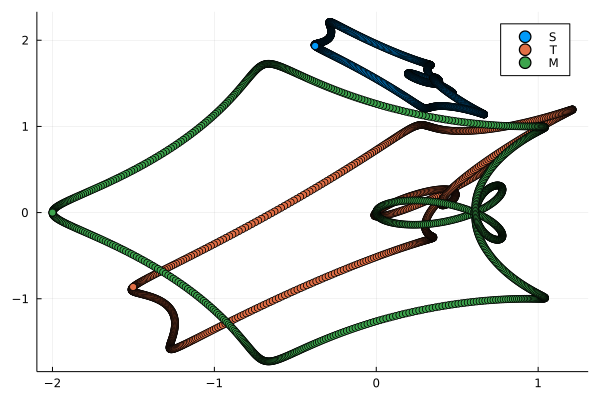

In [573]:
scatter(x[:,1],x[:,2], label="S")
scatter!(transfx[:,1],transfx[:,2], label="T")
scatter!(y_1, y_2, label="M")